In [16]:
using TaylorModels, Plots
using AffineArithmetic # in branch AffineArithmetic/af

In [17]:
example5(x) = 0.1*x*x*x - 0.5*x*x + 1
dom = Interval(0, 6)

[0, 6]

In [18]:
max_bound = example5(sup(dom))
min_bound = example5(10/3)
@show min_bound, max_bound

(min_bound, max_bound) = (-0.8518518518518516, 4.600000000000001)


(-0.8518518518518516, 4.600000000000001)

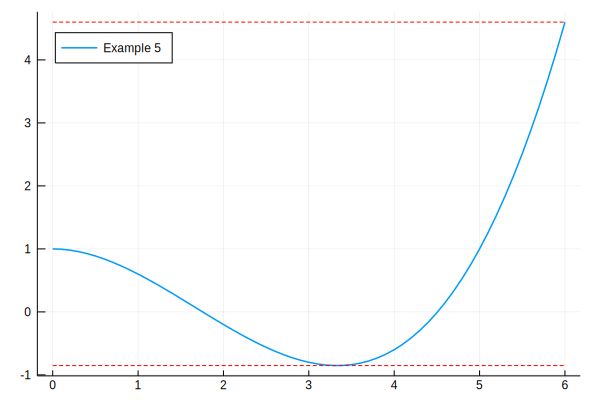

In [19]:
plot(x -> example5(x), inf(dom):0.1:sup(dom), lw=1.5, lab="Example 5", legend=:topleft)
plot!(x -> min_bound, inf(dom):0.1:sup(dom), color=:red, linestyle=:dash, lab="")
plot!(x -> max_bound, inf(dom):0.1:sup(dom), color=:red, linestyle=:dash, lab="")

In [20]:
# using interval arithmetic substitution
example5(dom)

[-17, 22.6001]

In [21]:
# using taylor model substitution
ord = 2
x0 = Interval(mid(dom))
y = TaylorModel1(ord, x0, dom)
evaluate(example5(y), dom - x0)

[-8.00001, 6.40001]

In [22]:
# using normalized taylor model substitution
ynorm = normalize_taylor(y.pol, dom - x0, true)
ynormTM = TaylorModel1(ynorm, 0..0, 0..0, -1..1)
evaluate(example5(ynormTM), -1..1)

[-4.40001, 6.40001]

In [23]:
# using affine arithmetic
x = AFF(dom, 1, 1)

affine=⟨3.0; [3.0]; [0, 0]⟩; range=[0, 6]

In [24]:
example5(x)

affine=⟨-0.7999999999999998; [-0.9]; [-4.5, 10.8001]⟩; range=[-7.2, 9.90001]

In [25]:
interval(example5(x))

[-7.2, 9.90001]

## Appendix 

Add the following lines in `AffineArithmetic#af`, file `src/AFF.jl`:

```julia
import Base.*
import Base.+

Base.:*(α::Real, C::AFF) = AFF(α*C.affine, α*C.range)
Base.:+(α::Real, C::AFF) = AFF(α + C.affine, C.range)
Base.:+(C::AFF, α::Real) = AFF(α + C.affine, C.range)
interval(C::AFF) = C.range
```

### Examples

First consider an example in one variable.

In [26]:
dom = 1..3
x = AFF(dom, 1, 1) # one variable, this is the first one

affine=⟨2.0; [1.0]; [0, 0]⟩; range=[1, 3]

In [27]:
interval(x^3) # evaluation

[1, 27]

Consider an example in two variables.

In [28]:
x = AFF(1..3, 2, 1) # two variables, this is the first one

affine=⟨2.0; [1.0, 0.0]; [0, 0]⟩; range=[1, 3]

In [29]:
y = AFF(4..6, 2, 2) # two variables, this is the second one

affine=⟨5.0; [0.0, 1.0]; [0, 0]⟩; range=[4, 6]

In [30]:
interval(x * y) # evaluation

[4, 18]